In [5]:
import pandas as pd
import kagglehub

# Download latest version
path = "/content/retail_store_inventory.csv"

# print("Path to dataset files:", path)
df = pd.read_csv(path)

# Basic inspection
print(df.shape)
display(df.head())
df.info()
df.describe()

(73100, 15)


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
72,2022-01-01,S004,P0013,Furniture,East,191,56,65,54.47,61.81,0,Sunny,0,63.92,Autumn
71,2022-01-01,S004,P0012,Electronics,North,349,9,165,0.95,14.25,5,Rainy,1,18.56,Spring
70,2022-01-01,S004,P0011,Electronics,West,205,46,27,46.65,54.84,0,Sunny,1,57.76,Spring
69,2022-01-01,S004,P0010,Groceries,East,447,104,96,115.03,33.48,15,Cloudy,0,37.15,Summer


In [7]:
print("Unique Stores:", df['Store ID'].nunique())
print("Unique Products:", df['Product ID'].nunique())
print("Unique Categories:", df['Category'].nunique())
print("Unique Regions:", df['Region'].nunique())
print("Unique Weather Conditions:", df['Weather Condition'].unique())
print("Unique Seasonality:", df['Seasonality'].unique())


Unique Stores: 5
Unique Products: 20
Unique Categories: 5
Unique Regions: 4
Unique Weather Conditions: ['Rainy' 'Sunny' 'Cloudy' 'Snowy']
Unique Seasonality: ['Autumn' 'Spring' 'Summer' 'Winter']


In [9]:
print(df.shape)
print(df.duplicated().sum())
print(df.isnull().sum())
# quick impossible-value checks
print((df['Units Sold'] < 0).sum(), (df['Price'] < 0).sum())

(73100, 15)
0
Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64
0 0


# Date Wise Trends

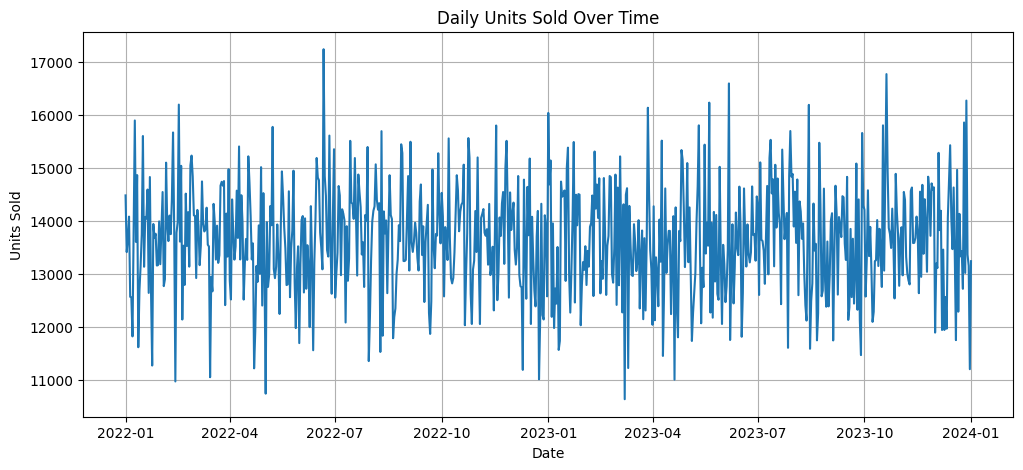

In [8]:
import matplotlib.pyplot as plt

df_daily = df.groupby("Date")["Units Sold"].sum()

plt.figure(figsize=(12,5))
plt.plot(df_daily)
plt.title("Daily Units Sold Over Time")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.grid(True)
plt.show()

# Category Wise Trends


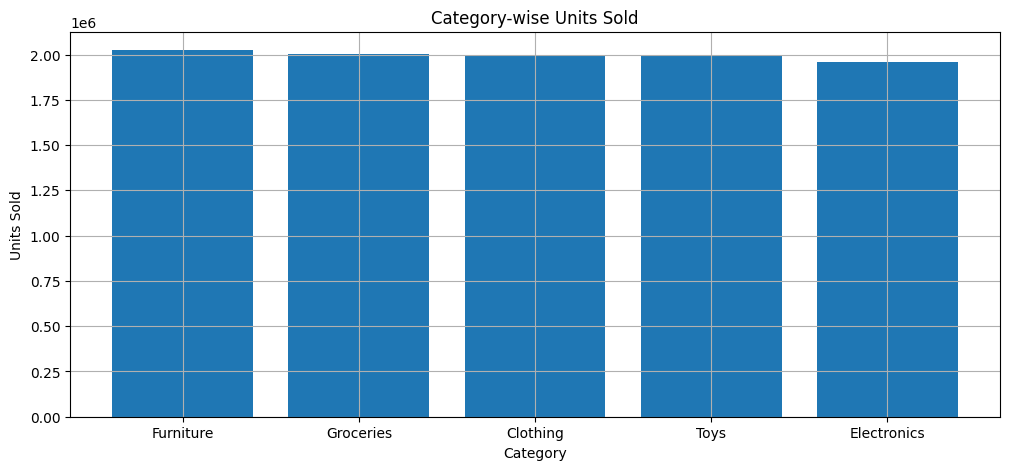

In [11]:
df_category = df.groupby("Category")["Units Sold"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,5))
plt.bar(df_category.index, df_category.values)
plt.title("Category-wise Units Sold")
plt.xlabel("Category")
plt.ylabel("Units Sold")
plt.grid(True)
plt.show()

# Promotion Based Trends

Mean Units Sold for Promotions: 136.4239264985008
Mean Units Sold for Non-Promotions: 136.50537458840176


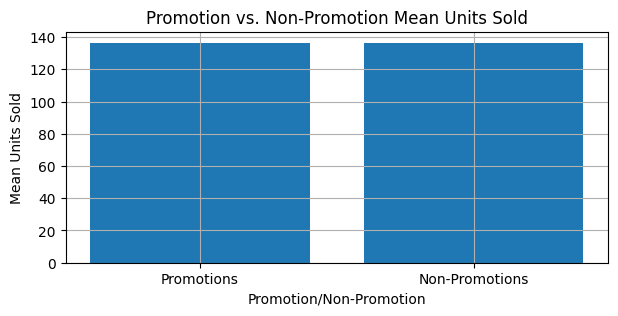

In [16]:
promo_mean = df[df['Holiday/Promotion']==1]['Units Sold'].mean()
non_promo_mean = df[df['Holiday/Promotion']==0]['Units Sold'].mean()

print("Mean Units Sold for Promotions:", promo_mean)
print("Mean Units Sold for Non-Promotions:", non_promo_mean)

plt.figure(figsize=(7,3))
plt.bar(['Promotions', 'Non-Promotions'], [promo_mean, non_promo_mean])
plt.title("Promotion vs. Non-Promotion Mean Units Sold")
plt.xlabel("Promotion/Non-Promotion")
plt.ylabel("Mean Units Sold")
plt.grid(True)
plt.show()

# Feature Engineering

In [17]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.isocalendar().week.astype(int)
df['day'] = df['Date'].dt.day
df['day_of_week'] = df['Date'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5,6]).astype(int)
df['quarter'] = df['Date'].dt.quarter

# creating separate columns for Model to know the time in more detail.

# Lag Features
Creating columns to store past sales data for future prediction

In [18]:
df = df.sort_values(['Store ID','Product ID','Date'])

df['lag_1'] = df.groupby(['Store ID','Product ID'])['Units Sold'].shift(1)
df['lag_7'] = df.groupby(['Store ID','Product ID'])['Units Sold'].shift(7)
df['lag_30'] = df.groupby(['Store ID','Product ID'])['Units Sold'].shift(30)


# Rolling Features

In [21]:
df['rolling_mean_7'] = df.groupby(['Store ID','Product ID'])['Units Sold'].shift(1).rolling(7).mean()
df['rolling_mean_30'] = df.groupby(['Store ID','Product ID'])['Units Sold'].shift(1).rolling(30).mean()
df['rolling_std_7'] = df.groupby(['Store ID','Product ID'])['Units Sold'].shift(1).rolling(7).std()


# Business Features

In [22]:
df['effective_price'] = df['Price'] * (1 - df['Discount']/100)
df['price_gap'] = df['Competitor Pricing'] - df['effective_price']
df['inv_ratio'] = df['Inventory Level'] / (df['Units Sold'] + 1)
df['forecast_error'] = df['Units Sold'] - df['Demand Forecast']
df['promo_flag'] = df['Holiday/Promotion']
df['seasonality_code'] = df['Seasonality'].astype('category').cat.codes
df['weather_code'] = df['Weather Condition'].astype('category').cat.codes


In [23]:
df = df.dropna().reset_index(drop=True)


Engineered a comprehensive feature set including time-based attributes, lagged demand signals, rolling statistics, price elasticity indicators, competitive pricing gaps, and inventory-demand interaction metrics, improving forecasting accuracy and enabling richer business interpretation.

In [32]:
# print(df.shape)
print(df.info())
# print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70100 entries, 0 to 70099
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                70100 non-null  datetime64[ns]
 1   Store ID            70100 non-null  object        
 2   Product ID          70100 non-null  object        
 3   Category            70100 non-null  object        
 4   Region              70100 non-null  object        
 5   Inventory Level     70100 non-null  int64         
 6   Units Sold          70100 non-null  int64         
 7   Units Ordered       70100 non-null  int64         
 8   Demand Forecast     70100 non-null  float64       
 9   Price               70100 non-null  float64       
 10  Discount            70100 non-null  int64         
 11  Weather Condition   70100 non-null  object        
 12  Holiday/Promotion   70100 non-null  int64         
 13  Competitor Pricing  70100 non-null  float64   

# Model and Evaluation

In [33]:
# Run this once
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import joblib
import os
# Optional: XGBoost (install via pip if not present)
try:
    import xgboost as xgb
    has_xgb = True
except Exception:
    has_xgb = False
    print("XGBoost not available. You can `pip install xgboost` to use it.")


In [34]:
# assume `df` is your FE'd dataframe
df = df.copy()
df = df.sort_values('Date').reset_index(drop=True)

# choose validation window
val_days = 90
test_days = 30   # optional second holdout / final test
max_date = df['Date'].max()
val_start = max_date - pd.Timedelta(days=val_days + test_days)  # train before this
val_cutoff = max_date - pd.Timedelta(days=test_days)           # validation end

print("Max date:", max_date, "Validation starts after:", val_start, "Validation ends at:", val_cutoff)

train_df = df[df['Date'] <= val_start].copy()
val_df   = df[(df['Date'] > val_start) & (df['Date'] <= val_cutoff)].copy()
test_df  = df[df['Date'] > val_cutoff].copy()  # optional final test set

print("Shapes -> train:", train_df.shape, "val:", val_df.shape, "test:", test_df.shape)


Max date: 2024-01-01 00:00:00 Validation starts after: 2023-09-03 00:00:00 Validation ends at: 2023-12-02 00:00:00
Shapes -> train: (58100, 35) val: (9000, 35) test: (3000, 35)


In [35]:
target = 'Units Sold'

# Candidate features (from your FE set)
features = [
    # time
    'year','month','week','day_of_week','is_weekend','quarter',
    # lags & rolling
    'lag_1','lag_7','lag_30','rolling_mean_7','rolling_mean_30','rolling_std_7',
    # pricing/inventory
    'effective_price','price_gap','Discount','Competitor Pricing','Inventory Level','inv_ratio',
    # demand signals
    'Demand Forecast','forecast_error',
    # flags / encodings
    'promo_flag','seasonality_code','weather_code'
]

# verify columns exist
missing = [c for c in features if c not in df.columns]
if missing:
    raise ValueError("Missing feature columns: " + str(missing))


In [37]:
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100
    return {'MAE': mae, 'RMSE': rmse, 'MAPE(%)': mape}

# Baseline on validation set:
val_df = val_df.copy()
val_df['baseline_lag1'] = val_df['lag_1']
val_df['baseline_roll7'] = val_df['rolling_mean_7']

print("Baseline (lag1) eval:", evaluate(val_df[target], val_df['baseline_lag1']))
print("Baseline (roll7) eval:", evaluate(val_df[target], val_df['baseline_roll7']))

Baseline (lag1) eval: {'MAE': 120.09666666666666, 'RMSE': np.float64(153.88249557517724), 'MAPE(%)': np.float64(5256667024.812584)}
Baseline (roll7) eval: {'MAE': 93.63457142857142, 'RMSE': np.float64(115.89860704791174), 'MAPE(%)': np.float64(5181587645.134066)}


# Preprocess for Model training

In [38]:
# Build X/y
X_train = train_df[features].copy()
y_train = train_df[target].copy()
X_val   = val_df[features].copy()
y_val   = val_df[target].copy()

# Impute NaNs with a simple strategy (0 or group median). We use group-wise fill for stability:
X_train = X_train.fillna(0)
X_val   = X_val.fillna(0)

# Optionally scale numeric features for linear models - random forest doesn't require scaling.


# Linear Regression for interpretability

In [39]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_val)
metrics_lr = evaluate(y_val, pred_lr)
print("LinearRegression:", metrics_lr)


LinearRegression: {'MAE': 3.9464538476356434e-14, 'RMSE': np.float64(5.009847634925075e-14), 'MAPE(%)': np.float64(6.116916291193714e-06)}


In [40]:
coef_df = pd.DataFrame({'feature': X_train.columns, 'coef': lr.coef_})
coef_df.sort_values('coef', key=lambda x: x.abs(), ascending=False).head(10)


,feature,coef
18,Demand Forecast,1.000000e+00
19,forecast_error,1.000000e+00
4,is_weekend,2.278068e-14
3,day_of_week,-1.417602e-14
5,quarter,-1.345740e-14
0,year,3.959280e-15
1,month,-1.817990e-15
2,week,1.303340e-15
17,inv_ratio,-6.310057e-16
14,Discount,-3.504015e-16


# Random Forest for non linear connections

In [41]:
rf = RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_val)
metrics_rf = evaluate(y_val, pred_rf)
print("RandomForest:", metrics_rf)


RandomForest: {'MAE': 0.18054555555555535, 'RMSE': np.float64(0.3029544978668871), 'MAPE(%)': np.float64(83333.6437246145)}


In [42]:
# Feature importance
imp = pd.DataFrame({'feature': X_train.columns, 'importance': rf.feature_importances_})
imp.sort_values('importance', ascending=False).head(15)

,feature,importance
18,Demand Forecast,9.941676e-01
19,forecast_error,5.469942e-03
17,inv_ratio,3.141054e-04
16,Inventory Level,3.252069e-05
8,lag_30,1.385611e-06
7,lag_7,1.373452e-06
10,rolling_mean_30,1.353750e-06
6,lag_1,1.321372e-06
11,rolling_std_7,1.304395e-06
13,price_gap,1.295076e-06


In [44]:
if has_xgb:
    xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, n_jobs=-1, random_state=42)
    # Removed early_stopping_rounds and verbose as they are causing TypeError in this XGBoost version
    xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)])
    pred_xgb = xgb_model.predict(X_val)
    metrics_xgb = evaluate(y_val, pred_xgb)
    print("XGBoost:", metrics_xgb)

[0]	validation_0-rmse:103.51545
[1]	validation_0-rmse:98.36041
[2]	validation_0-rmse:93.46803
[3]	validation_0-rmse:88.81593
[4]	validation_0-rmse:84.39749
[5]	validation_0-rmse:80.19901
[6]	validation_0-rmse:76.21204
[7]	validation_0-rmse:72.42119
[8]	validation_0-rmse:68.82052
[9]	validation_0-rmse:65.39911
[10]	validation_0-rmse:62.14581
[11]	validation_0-rmse:59.05543
[12]	validation_0-rmse:56.12035
[13]	validation_0-rmse:53.33197
[14]	validation_0-rmse:50.68267
[15]	validation_0-rmse:48.16308
[16]	validation_0-rmse:45.76978
[17]	validation_0-rmse:43.49831
[18]	validation_0-rmse:41.33834
[19]	validation_0-rmse:39.28458
[20]	validation_0-rmse:37.33440
[21]	validation_0-rmse:35.47878
[22]	validation_0-rmse:33.71525
[23]	validation_0-rmse:32.04181
[24]	validation_0-rmse:30.45071
[25]	validation_0-rmse:28.94007
[26]	validation_0-rmse:27.50249
[27]	validation_0-rmse:26.13841
[28]	validation_0-rmse:24.84120
[29]	validation_0-rmse:23.60743
[30]	validation_0-rmse:22.43643
[31]	validation_0

In [45]:
results = {
    'baseline_lag1': evaluate(val_df[target], val_df['baseline_lag1']),
    'baseline_roll7': evaluate(val_df[target], val_df['baseline_roll7']),
    'LinearRegression': metrics_lr,
    'RandomForest': metrics_rf
}
if has_xgb:
    results['XGBoost'] = metrics_xgb

import pprint
pprint.pprint(results)


{'LinearRegression': {'MAE': 3.9464538476356434e-14,
                      'MAPE(%)': np.float64(6.116916291193714e-06),
                      'RMSE': np.float64(5.009847634925075e-14)},
 'RandomForest': {'MAE': 0.18054555555555535,
                  'MAPE(%)': np.float64(83333.6437246145),
                  'RMSE': np.float64(0.3029544978668871)},
 'XGBoost': {'MAE': 0.5515456199645996,
             'MAPE(%)': np.float64(12894049.3378125),
             'RMSE': np.float64(0.8349897413137557)},
 'baseline_lag1': {'MAE': 120.09666666666666,
                   'MAPE(%)': np.float64(5256667024.812584),
                   'RMSE': np.float64(153.88249557517724)},
 'baseline_roll7': {'MAE': 93.63457142857142,
                    'MAPE(%)': np.float64(5181587645.134066),
                    'RMSE': np.float64(115.89860704791174)}}


# Forecast vs Actual


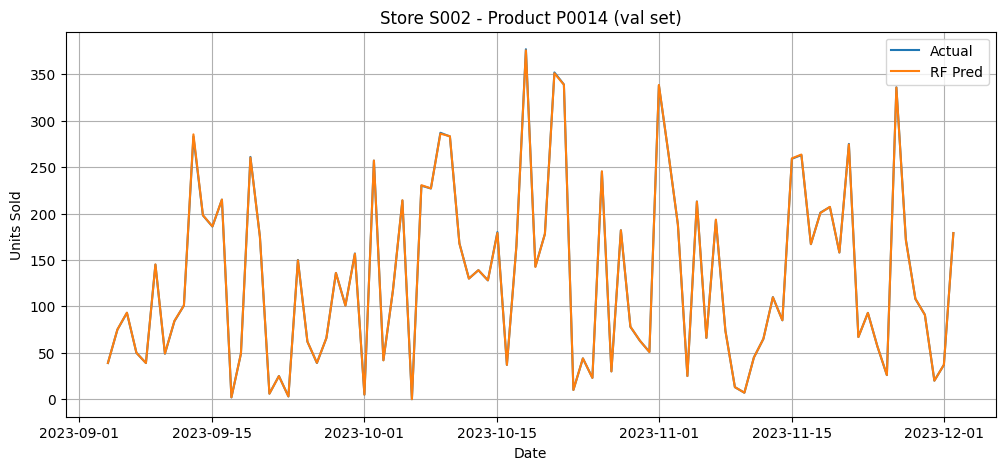

In [48]:
def plot_store_product(store_id, product_id, n_points=200):
    mask = (val_df['Store ID']==store_id) & (val_df['Product ID']==product_id)
    slice_df = val_df[mask].sort_values('Date').copy()
    if slice_df.shape[0] < 10:
        print("Not enough points for that store-product in validation.")
        return
    sX = slice_df[features].fillna(0)
    slice_df['pred_rf'] = rf.predict(sX)
    plt.figure(figsize=(12,5))
    plt.plot(slice_df['Date'], slice_df['Units Sold'], label='Actual')
    plt.plot(slice_df['Date'], slice_df['pred_rf'], label='RF Pred')
    plt.title(f"Store {store_id} - Product {product_id} (val set)")
    plt.xlabel("Date")
    plt.ylabel("Units Sold")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example: pick a store/product from validation
example_store = val_df['Store ID'].iloc[0]
example_product = val_df['Product ID'].iloc[0]
plot_store_product(example_store, example_product)


# Forecast csv for Tableau

In [49]:
val_out = val_df.copy()
val_out['Units_Sold_Pred_RF'] = pred_rf
val_out[['Date','Store ID','Product ID','Category','Region','Units Sold','Units_Sold_Pred_RF']].to_csv('/content/forecasts_val.csv', index=False)

# If you generated test preds, include them too
if 'pred_xgb' in locals():
    test_df = test_df.copy()
    test_df['Units_Sold_Pred_XGB'] = xgb_model.predict(test_df[features].fillna(0))
    test_df[['Date','Store ID','Product ID','Units Sold','Units_Sold_Pred_XGB']].to_csv('/content/forecasts_test.csv', index=False)


# Model Comparision

In [51]:
# ----- imports (if not already loaded) -----
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# ----- helper -----
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100

def evaluate(y_true, y_pred):
    return {
        'MAE': float(mean_absolute_error(y_true, y_pred)),
        'RMSE': float(np.sqrt(mean_squared_error(y_true, y_pred))),
        'MAPE(%)': float(mape(y_true, y_pred))
    }

# ----- Assume: train_df, val_df, test_df, features, target exist and rf, lr, xgb_model maybe exist -----
results = {}

# Baselines (lag1 & rolling7)
val_df = val_df.copy()
val_df['baseline_lag1']  = val_df['lag_1'].fillna(0)
val_df['baseline_roll7'] = val_df['rolling_mean_7'].fillna(val_df['lag_1'].fillna(0))

results['baseline_lag1']  = evaluate(val_df[target], val_df['baseline_lag1'])
results['baseline_roll7'] = evaluate(val_df[target], val_df['baseline_roll7'])

# Linear Regression (if lr exists)
try:
    pred_lr = lr.predict(val_df[features].fillna(0))
    results['LinearRegression'] = evaluate(val_df[target], pred_lr)
except NameError:
    results['LinearRegression'] = 'model_missing'

# Random Forest (rf)
try:
    pred_rf = rf.predict(val_df[features].fillna(0))
    val_df['pred_rf'] = pred_rf
    results['RandomForest'] = evaluate(val_df[target], pred_rf)
except NameError:
    results['RandomForest'] = 'model_missing'

# XGBoost (optional)
if 'xgb_model' in globals():
    pred_xgb = xgb_model.predict(val_df[features].fillna(0))
    results['XGBoost'] = evaluate(val_df[target], pred_xgb)

# Create tidy DataFrame for reporting
rows = []
for k, v in results.items():
    if isinstance(v, dict):
        rows.append({'Model': k, **v})
    else:
        rows.append({'Model': k, 'MAE': None, 'RMSE': None, 'MAPE(%)': None})
metrics_df = pd.DataFrame(rows).sort_values('MAE')
print(metrics_df)

# Save metrics
metrics_df.to_csv('/content/model_metrics_summary.csv', index=False)
print("Saved /content/model_metrics_summary.csv")

              Model           MAE          RMSE       MAPE(%)
2  LinearRegression  3.946454e-14  5.009848e-14  6.116916e-06
3      RandomForest  1.805456e-01  3.029545e-01  8.333364e+04
4           XGBoost  5.515456e-01  8.349897e-01  1.289405e+07
1    baseline_roll7  9.363457e+01  1.158986e+02  5.181588e+09
0     baseline_lag1  1.200967e+02  1.538825e+02  5.256667e+09
Saved /content/model_metrics_summary.csv


In [52]:
# create folder
import os
os.makedirs('/content/dashboard_assets', exist_ok=True)

# utility to create plots and save
def plot_forecast_vs_actual(df_slice, pred_col='pred_rf', filename='plot.png', title=None):
    plt.figure(figsize=(12,4))
    plt.plot(df_slice['Date'], df_slice['Units Sold'], label='Actual', linewidth=1.5)
    plt.plot(df_slice['Date'], df_slice[pred_col], label='Pred', linewidth=1.2, alpha=0.9)
    plt.title(title or 'Forecast vs Actual')
    plt.xlabel('Date')
    plt.ylabel('Units Sold')
    plt.legend()
    plt.tight_layout()
    plt.savefig(filename, dpi=150)
    plt.close()
    print("Saved", filename)

# Helper to choose store-product combos:
def pick_examples(val_df):
    # 1. High-volume product = product with highest avg units in validation
    avg_by_prod = val_df.groupby(['Store ID','Product ID'])['Units Sold'].mean().reset_index()
    high = avg_by_prod.sort_values('Units Sold', ascending=False).iloc[0]
    # 2. Low-volume product = lowest avg > 0
    low = avg_by_prod[avg_by_prod['Units Sold']>0].sort_values('Units Sold').iloc[0]
    # 3. Promo-driven = highest uplift during promotions (promo mean / non-promo mean)
    promo_uplift = val_df.groupby(['Store ID','Product ID']).apply(
        lambda g: (g[g['promo_flag']==1]['Units Sold'].mean()+1e-6) / (g[g['promo_flag']==0]['Units Sold'].mean()+1e-6)
    ).reset_index(name='promo_uplift').sort_values('promo_uplift', ascending=False).iloc[0]
    return (high, low, promo_uplift)

h, l, p = pick_examples(val_df)

# Generate slices and ensure pred_rf exists
for tup, label in zip([h, l, p], ['high_volume','low_volume','promo_driven']):
    store, product = tup['Store ID'], tup['Product ID']
    mask = (val_df['Store ID']==store) & (val_df['Product ID']==product)
    slice_df = val_df[mask].sort_values('Date').copy()
    if 'pred_rf' not in slice_df.columns:
        slice_df['pred_rf'] = rf.predict(slice_df[features].fillna(0))
    filename = f'/content/dashboard_assets/{label}_store_{store}_prod_{product}.png'
    title = f'Store {store} - Product {product} ({label}) - Forecast vs Actual (val)'
    plot_forecast_vs_actual(slice_df, pred_col='pred_rf', filename=filename, title=title)


/tmp/ipython-input-2532106442.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  promo_uplift = val_df.groupby(['Store ID','Product ID']).apply(


Saved /content/dashboard_assets/high_volume_store_S005_prod_P0003.png
Saved /content/dashboard_assets/low_volume_store_S004_prod_P0002.png
Saved /content/dashboard_assets/promo_driven_store_S002_prod_P0019.png
